For today's notebook, we will want to use the pingouin module that was covered in the
notes. This module is not available by default in Google Colab, but we can install it
manually but calling the following line of code (you'll need to reinstall the module
each time that you restart Colab).



In [1]:
! pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 6.0 MB/s eta 0:00:00




Then, we can install pingouin as well as all of the other modules that we need for
today.



In [2]:
import pandas as pd
import numpy as np
import pingouin as pg
from plotnine import *

theme_set(theme_minimal())



Next, let's load all of the data that we need for the notebook. We will load these
from our Google Sheets files.



In [3]:
file_id = "1CVHofm5ukU3CRh2-jvJdu_t4jPXRPFryOTZIo-lWN6E"
burl = "https://docs.google.com/spreadsheets/d/"

people = pd.read_csv(f"{burl}{file_id}/export?format=csv&gid={922517864}")
questions = pd.read_csv(f"{burl}{file_id}/export?format=csv&gid={557785832}")
res = pd.read_csv(f"{burl}{file_id}/export?format=csv&gid={1275588727}")
words = pd.read_csv(f"{burl}{file_id}/export?format=csv&gid={35710064}")
mem = pd.read_csv(f"{burl}{file_id}/export?format=csv&gid={1424664819}")

words['word'] = words['word'].str.strip()
mem['guess'] = mem['guess'].str.strip()



Now, we will go through each of these datasets and do some analysis.

## Activity 1: Confidence Intervals

To start, look at the `res` dataset:



In [4]:
res

,name,question,low,high,notes
0,coy_fan,1,1000000,5000000,NaN
1,coy_fan,2,20000000,75000000,NaN
2,coy_fan,3,70,101,NaN
3,coy_fan,4,7,17,NaN
4,coy_fan,5,1100,1300,NaN
...,...,...,...,...,...
363,dolphin06,10,3000,7000,NaN
364,dolphin06,11,70,71,NaN
365,dolphin06,12,65,66,NaN
366,dolphin06,13,300,700,NaN




And the `questions` dataset



In [5]:
questions

,number,text,units,value,short
0,1,How many people live in the city of Richmond?,people,226610.0,Richmond
1,2,How many people live in Virginia?,people,8811195.0,Virginia
2,3,How many countries are member states of the Un...,countries,193.0,United Nations
3,4,What is the diameter of a basketball hoop?,inches,18.0,Basketball
4,5,What year was Charlamagne crowned Emperor by t...,year,800.0,Charlamagne
5,6,"Among adults who drink coffee, how many cups o...",cups,3.0,Coffee
6,7,What is the average lifespan of a domestic cat?,years,15.0,Cat
7,8,How many episodes of Friends were produced?,episodes,236.0,Episodes
8,9,What is the median length of an episode of Fri...,minutes,23.0,Duration
9,10,What is the average number of steps an adult t...,steps,4500.0,Steps




In the code below, we are going to create a new dataset called `res_merge` that has the results
dataset merged into the questions. Then, in the same chain, merge into the `people` dataset.
After you merge the two, add a column called `correct` to the dataset that checks whether the
predictions were correct. Normally we would make these boolean values (True/False).



In [14]:
res_merge = (
    res
    .merge(questions, left_on="question", right_on="number")
    .merge(people, on="name")
    .eval("correct = (value >= low) & (value <= high)")
)
res_merge.head(10)

,name,question,low,high,notes,number,text,units,value,short,section,lived_in_virginia,played_basketball,fan_friends,technique,correct
0,coy_fan,1,1000000,5000000,NaN,1,How many people live in the city of Richmond?,people,226610.0,Richmond,1,N,N,N,Repeat the word to self,False
1,coy_fan,2,20000000,75000000,NaN,2,How many people live in Virginia?,people,8811195.0,Virginia,1,N,N,N,Repeat the word to self,False
2,coy_fan,3,70,101,NaN,3,How many countries are member states of the Un...,countries,193.0,United Nations,1,N,N,N,Repeat the word to self,False
3,coy_fan,4,7,17,NaN,4,What is the diameter of a basketball hoop?,inches,18.0,Basketball,1,N,N,N,Repeat the word to self,False
4,coy_fan,5,1100,1300,NaN,5,What year was Charlamagne crowned Emperor by t...,year,800.0,Charlamagne,1,N,N,N,Repeat the word to self,False
5,coy_fan,6,2,4,NaN,6,"Among adults who drink coffee, how many cups o...",cups,3.0,Coffee,1,N,N,N,Repeat the word to self,True
6,coy_fan,7,6,12,NaN,7,What is the average lifespan of a domestic cat?,years,15.0,Cat,1,N,N,N,Repeat the word to self,False
7,coy_fan,8,100,300,NaN,8,How many episodes of Friends were produced?,episodes,236.0,Episodes,1,N,N,N,Repeat the word to self,True
8,coy_fan,9,30,50,NaN,9,What is the median length of an episode of Fri...,minutes,23.0,Duration,1,N,N,N,Repeat the word to self,False
9,coy_fan,10,5000,15000,NaN,10,What is the average number of steps an adult t...,steps,4500.0,Steps,1,N,N,N,Repeat the word to self,False




Perfect! Let's see how well the class knew each question. In the code below, group
by the short code of the question (it's better than the number because we will know
what it actually refers to) and compute the average number of correct responses.
Order the output by the proportion correct and take a few moments to see what are
the easiest and hardest questions.



In [17]:
(
    res_merge
    .groupby("short")
    .agg(
        avg_correct = ("correct", "mean")
    )
    .sort_values("avg_correct", ascending = False)
)

,avg_correct
short,
Coffee,0.961538
Duration,0.769231
Male Height,0.703704
Female Height,0.703704
Cat,0.615385
Steps,0.576923
Basketball,0.538462
Richmond,0.346154
United Nations,0.346154




Next, let's create a plot from the data. We will break this down into two steps.
First, create a dataset called `res_q` that has just the results from question number 3.



In [21]:
res_q = (
    res_merge
    .query("question == 3")
)
res_q

,name,question,low,high,notes,number,text,units,value,short,section,lived_in_virginia,played_basketball,fan_friends,technique,correct
2,coy_fan,3,70,101,NaN,3,How many countries are member states of the Un...,countries,193.0,United Nations,1,N,N,N,Repeat the word to self,False
16,Rhino,3,20,50,NaN,3,How many countries are member states of the Un...,countries,193.0,United Nations,1,N,N,Y,repeat words in order adding each word on,False
30,raccon_hands,3,50,200,NaN,3,How many countries are member states of the Un...,countries,193.0,United Nations,1,Y,N,N,association and things in room,True
44,brownie3,3,50,193,NaN,3,How many countries are member states of the Un...,countries,193.0,United Nations,1,N,Y,Y,association,True
58,gray_bandit,3,125,150,NaN,3,How many countries are member states of the Un...,countries,193.0,United Nations,1,N,Y,N,created a story,False
72,koala04,3,20,35,NaN,3,How many countries are member states of the Un...,countries,193.0,United Nations,1,N,N,Y,clustering and repetition,False
86,starfish14,3,90,250,NaN,3,How many countries are member states of the Un...,countries,193.0,United Nations,1,N,N,N,stories and visuals,True
100,manatee,3,125,225,NaN,3,How many countries are member states of the Un...,countries,193.0,United Nations,1,N,N,Y,repeat words,True
114,cat_13,3,82,162,NaN,3,How many countries are member states of the Un...,countries,193.0,United Nations,1,N,N,N,envisioning,False
128,emu7,3,256,327,NaN,3,How many countries are member states of the Un...,countries,193.0,United Nations,1,N,N,N,"Story & Associations (heavy-metal, etc.)",False




Now, create a plot that shows the range of guesses as follows: create a horizontal line
segment with `geom_segment` that shows the low and high guesses of each student, with the
student ids on the y-axis.



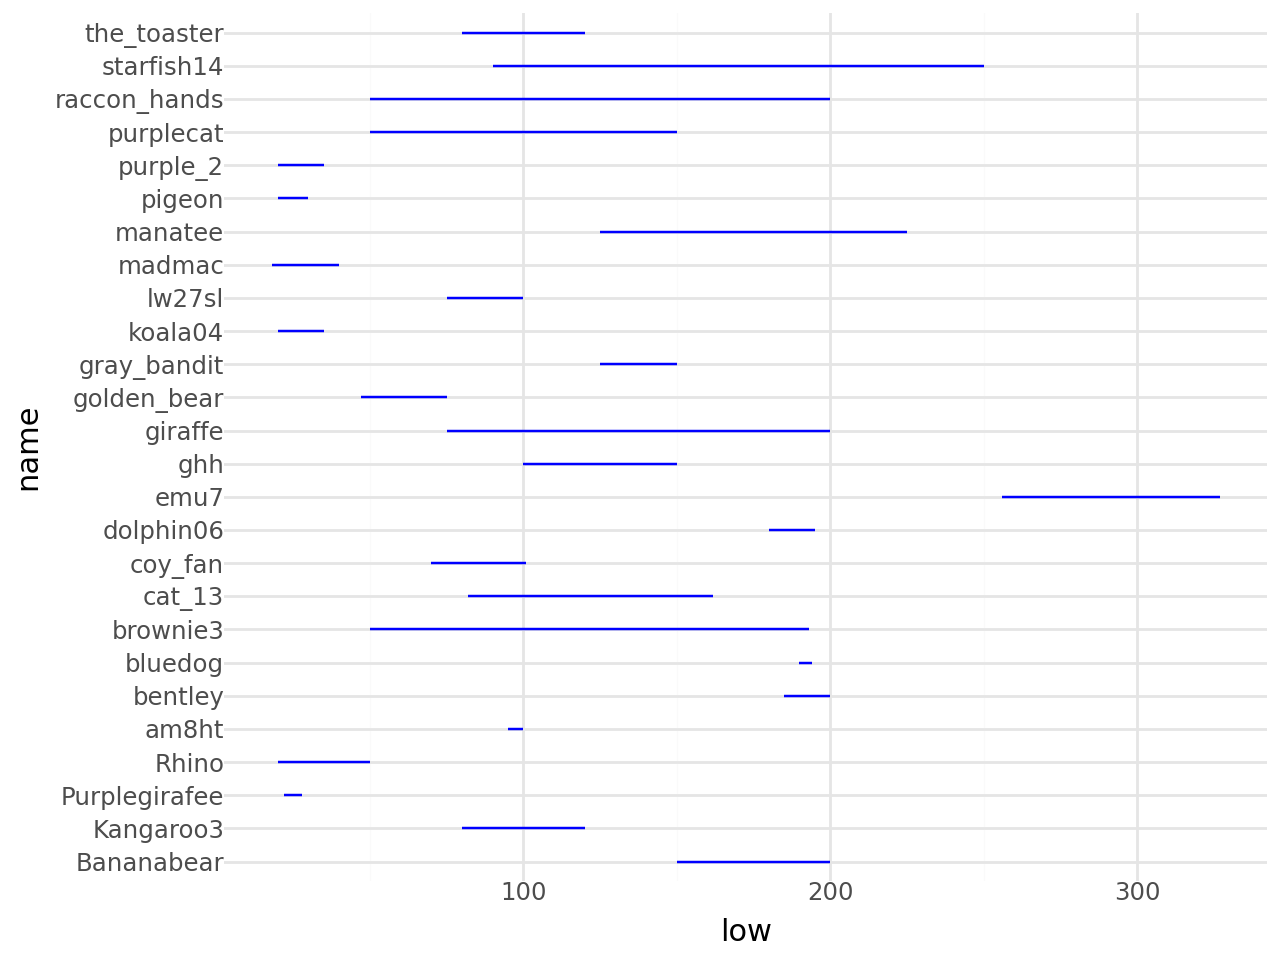

In [30]:
(
    ggplot(res_q, aes(y="name"))
    + geom_segment(aes(x="low", xend = "high", yend="name"), color = "blue")
)



This is nice, but we can do better. Modify the `y` aesthetic to be `reorder(name, low)`.
This will order to categories by the lower guess. Then, add a `geom_vline` layer that has
the parameter `xintercept` equal to 193 (the answer the question 3) and color the lines
based on whether the guess was correct.



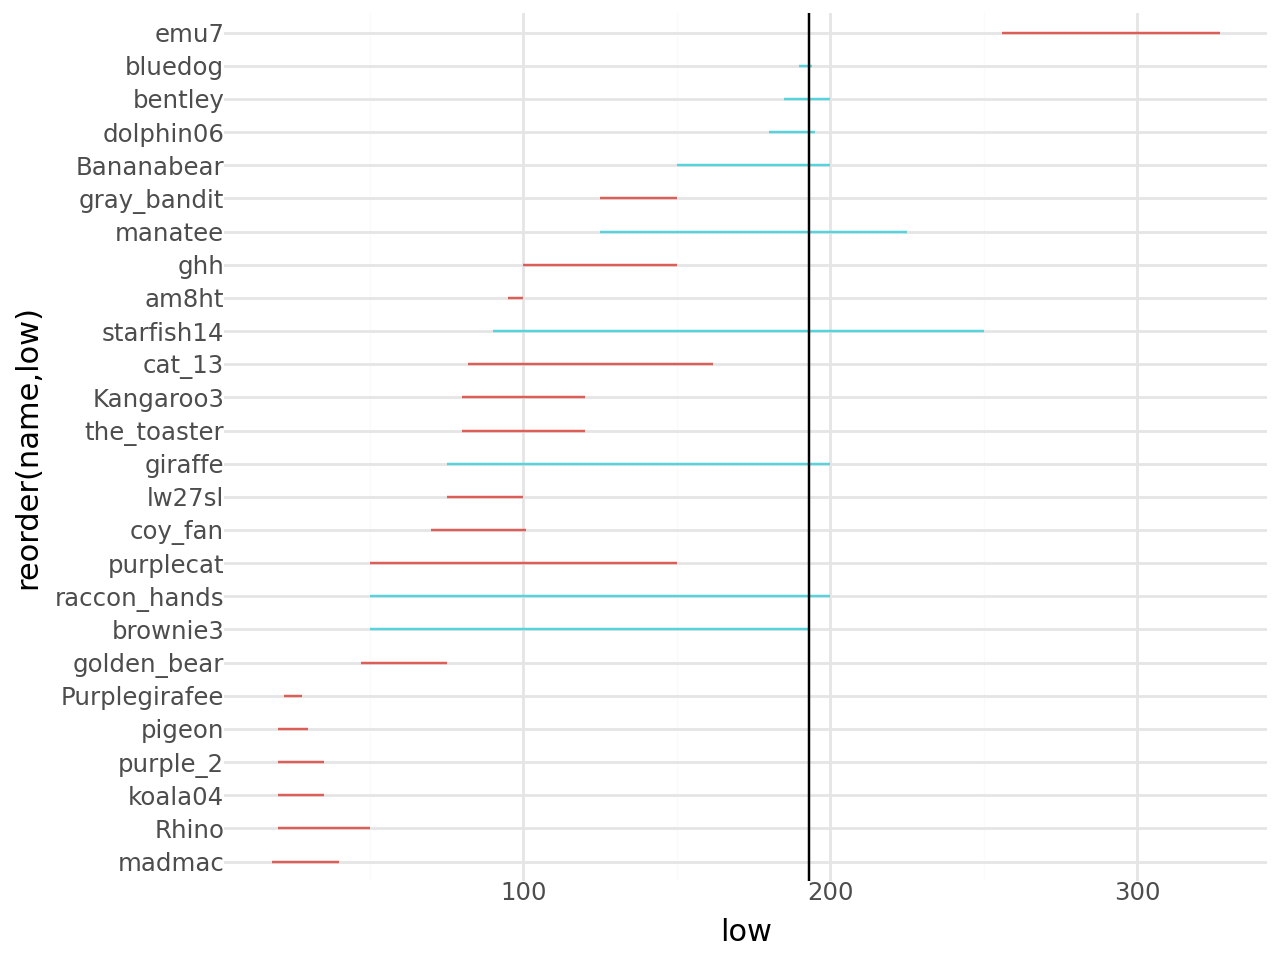

In [36]:
(
    ggplot(res_q, aes(y="reorder(name,low)"))
    + geom_segment(aes(x="low", xend = "high", yend="name", color = "correct"),show_legend = False)
    + geom_vline(xintercept = 193)
)



For the analysis that follows, we will want to convert the True/False values into integers (0/1).
The code below should do this once you have created the dataset above.



In [37]:
res_merge["correct"] = res_merge["correct"].astype(int)



Now, here is an example of how to run a two-sample T-test with our data, checking to see if there is
a difference between the average correct response (for a 0/1 variable, the average is the proportion)
between questions 1 and 2 (the two population ones). Do you see a statistically significant difference
between these two questions? What is the confidence interval?



In [38]:
pg.ttest(
    res_merge.loc[res_merge["question"] == 1, "correct"],
    res_merge.loc[res_merge["question"] == 2, "correct"]
)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.907841,50,two-sided,0.368317,"[-0.14, 0.37]",0.25179,0.391,0.144611




Question 7 concerns the number of episodes in Friends. Produce a two-sample T-test to see if fans
of Friends appear to be more likely to guess the number of episodes correctly.



In [50]:
pg.ttest(
    res_merge.loc[(res_merge["question"] == 7)&(res_merge["fan_friends"] == "Y"), "correct"],
    res_merge.loc[(res_merge["question"] == 7)&(res_merge["fan_friends"] == "N"), "correct"]
)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.121566,18.770231,two-sided,0.904535,"[-0.46, 0.41]",0.049386,0.372,0.051588




For a final T-test with this data, let's create a tag in the data that indicates whether a
quantity to measure is "small" (less than 1000) or "big" (greater than 1000). That can be
done with the following code:



In [48]:
res_merge["scale_category"] = pd.cut(
    res_merge["value"],
    bins=[0, 1000, np.inf],
    labels=["small", "large"]
)
res_merge.head(10)

,name,question,low,high,notes,number,text,units,value,short,section,lived_in_virginia,played_basketball,fan_friends,technique,correct,scale_category
0,coy_fan,1,1000000,5000000,NaN,1,How many people live in the city of Richmond?,people,226610.0,Richmond,1,N,N,N,Repeat the word to self,0,large
1,coy_fan,2,20000000,75000000,NaN,2,How many people live in Virginia?,people,8811195.0,Virginia,1,N,N,N,Repeat the word to self,0,large
2,coy_fan,3,70,101,NaN,3,How many countries are member states of the Un...,countries,193.0,United Nations,1,N,N,N,Repeat the word to self,0,small
3,coy_fan,4,7,17,NaN,4,What is the diameter of a basketball hoop?,inches,18.0,Basketball,1,N,N,N,Repeat the word to self,0,small
4,coy_fan,5,1100,1300,NaN,5,What year was Charlamagne crowned Emperor by t...,year,800.0,Charlamagne,1,N,N,N,Repeat the word to self,0,small
5,coy_fan,6,2,4,NaN,6,"Among adults who drink coffee, how many cups o...",cups,3.0,Coffee,1,N,N,N,Repeat the word to self,1,small
6,coy_fan,7,6,12,NaN,7,What is the average lifespan of a domestic cat?,years,15.0,Cat,1,N,N,N,Repeat the word to self,0,small
7,coy_fan,8,100,300,NaN,8,How many episodes of Friends were produced?,episodes,236.0,Episodes,1,N,N,N,Repeat the word to self,1,small
8,coy_fan,9,30,50,NaN,9,What is the median length of an episode of Fri...,minutes,23.0,Duration,1,N,N,N,Repeat the word to self,0,small
9,coy_fan,10,5000,15000,NaN,10,What is the average number of steps an adult t...,steps,4500.0,Steps,1,N,N,N,Repeat the word to self,0,large




Test whether the percent correct of the questions differs based on whether the question is one
that has a large number greater than 1000 or a small number less than 1000.



In [ ]:
pg.ttest(
    res_merge.loc[res_merge["scale_category"] == "small", "correct"],
    res_merge.loc[res_merge["scale_category"] == "large", "correct"]
)



Finally, group by the question number and create a variable called `too_low` to indicate
if a guess was too low and `too_high` if the guess was too high. Compute the proportions of:
too low guesses, too high guesses, and correct responses. Sort by one of these. Do you see
any interesting patterns or want to make any guesses as to why some questions were systematically
over or under guessed? Note: I don't have any agenda here. This is really an open question!



In [72]:
(
    res_merge
    .eval("too_low = (high < value)")
    .eval("too_high = (low > value)")
    .groupby("question")
    .agg(
        low_avg = ("too_low","mean"),
        high_avg = ("too_high","mean"),
        correct_avg = ("correct","mean")
    )
    .eval("debug = (low_avg + high_avg + correct_avg)")
    .reset_index()
)

,question,low_avg,high_avg,correct_avg,debug
0,1,0.115385,0.538462,0.346154,1.0
1,2,0.538462,0.230769,0.230769,1.0
2,3,0.615385,0.038462,0.346154,1.0
3,4,0.307692,0.153846,0.538462,1.0
4,5,0.076923,0.692308,0.230769,1.0
5,6,0.038462,0.000000,0.961538,1.0
6,7,0.269231,0.115385,0.615385,1.0
7,8,0.538462,0.192308,0.269231,1.0
8,9,0.076923,0.153846,0.769231,1.0
9,10,0.076923,0.346154,0.576923,1.0




## Activity 2: Memory Game

Here is the memory cross table:



In [51]:
mem

,name,guess,order
0,coy_fan,chair,1
1,coy_fan,bright,2
2,coy_fan,stone,3
3,coy_fan,apple,4
4,coy_fan,window,5
...,...,...,...
178,Kangaroo3,wooden,11
179,Kangaroo3,circle,12
180,Kangaroo3,carpet,13
181,Kangaroo3,sharp,14




And here is the metadata about the words:



In [52]:
words

,word,position,pos,in_room
0,chair,1,noun,Y
1,bright,2,adj,N
2,window,3,noun,Y
3,heavy,4,adj,N
4,apple,5,noun,N
5,smooth,6,adj,N
6,bottle,7,noun,N
7,quiet,8,adj,N
8,stone,9,noun,N
9,yellow,10,adj,N




In the code below, group the memory data by the guess, count the number of guesses for
each word, and then join with the words data to get the metadata about the words. Sort
the output by the count and save as a dataset called `word_cnt`. Take a little time to
look at the output. It's interesting!



In [78]:
guess_meta = (
    mem
    .groupby("guess")
    .agg(
        num_guess = ("guess", "count")
    )
    .merge(words, left_on="guess", right_on="word")
    .sort_values("position")
    .reset_index()
)
guess_meta

,index,num_guess,word,position,pos,in_room
0,5,14,chair,1,noun,Y
1,3,13,bright,2,adj,N
2,17,14,window,3,noun,Y
3,10,9,heavy,4,adj,N
4,0,11,apple,5,noun,N
5,15,14,smooth,6,adj,N
6,1,5,bottle,7,noun,N
7,12,3,quiet,8,adj,N
8,16,7,stone,9,noun,N
9,19,13,yellow,10,adj,N




Run a two-sample T-test that sees if the number of correct guesses on the first three
questions has the same mean as the questions after the first three.



In [83]:
pg.ttest(
    guess_meta.loc[guess_meta["position"] <= 3, "num_guess"],
    guess_meta.loc[guess_meta["position"] > 3, "num_guess"]
)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,6.376478,17.771849,two-sided,0.000006,"[3.72, 7.38]",1.772412,1850.428,0.763252




Next, the code below uses a few new tricks (along with many things you have seen before) to
create a table of all combinations of words and guesses. It shows for every combintation of
word and student, which word was guesses by which student.



In [ ]:
import itertools

pairs = list(itertools.product(words['word'], mem['name'].unique()))
df = (
    pd.DataFrame(pairs, columns=['word', 'name'])
    .merge(mem, left_on=["word", "name"], right_on=["guess", "name"], how="left")
    .eval('correct=order.notna()')
    .merge(words, on="word")
)
df



Do a two-sample T-test to see if there is a difference in the percentage of students who
were able to remember the work "fuck" compared to the other words in the dataset.





And do a two-sample T-test to check if the percentage of students who guessed correct
is related to whether the word is a noun or an adjective.





Finally, does there seem to be a difference between words associated with items in the room and
words not in the room?





Personally, I was a little surprised by a few of these results, but that's what makes data
analysis interesting!
